In [1]:
!pip install py4etrics

In [2]:
import numpy as np #
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import f1_score,  accuracy_score

from py4etrics.heckit import Heckit
from py4etrics.tobit import Tobit

### Загрузка данных

In [3]:
df = pd.read_csv("apple_quality.csv")

In [4]:
df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


### Обработка недостающих значений в наборе данных

In [6]:
df.isna().sum()

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

In [7]:
df = df.dropna()
df.isna().sum()

A_id           0
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [8]:
df['Acidity']=df['Acidity'].astype(float)
df.drop('A_id',axis=1,inplace=True)

### Преобразование категориальных данных в числовую форму¶

In [9]:
df['Quality']=df['Quality'].replace({'good':1,'bad':0})

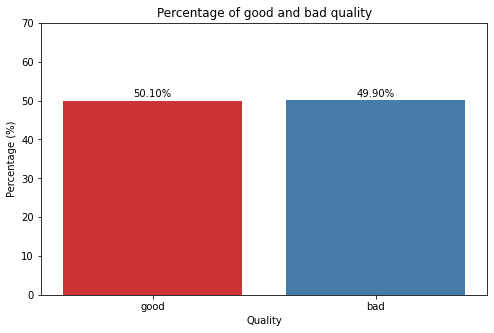

In [10]:
percentage = df['Quality'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=percentage.index, y=percentage, palette='Set1')
plt.title('Percentage of good and bad quality')
plt.xlabel('Quality')
plt.ylabel('Percentage (%)')
plt.xticks(ticks=[0, 1], labels=['good', 'bad'])
plt.yticks(ticks=range(0,80,10))

for i, p in enumerate(percentage):
    ax.text(i, p + 0.5, f'{p:.2f}%', ha='center', va='bottom')

plt.show()

### Предварительная обработка данных

In [11]:
X=df.drop('Quality',axis=1)
y=df['Quality']
df1=df.copy()
X1=X.copy()
y1=y.copy()

<AxesSubplot:>

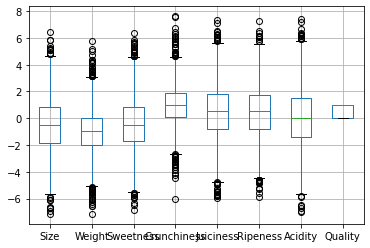

In [12]:
df.boxplot()

<AxesSubplot:>

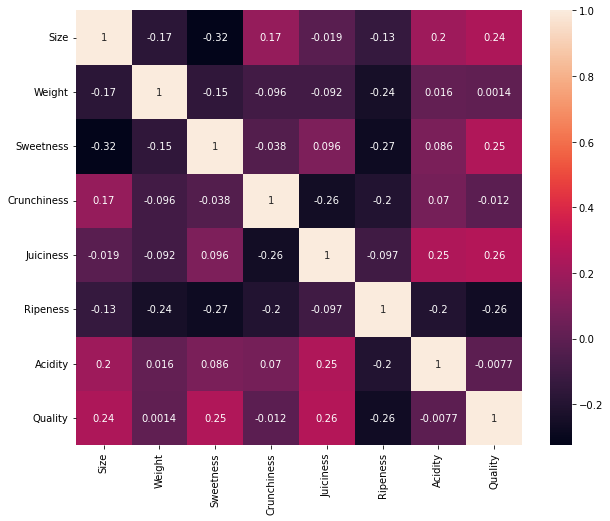

In [13]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot = True)

мультиколлинеарность отсутствует

### Построение моделей

## Logit

In [14]:
logit = sm.Logit(y,sm.add_constant(X)).fit()
logit.summary()

Optimization terminated successfully.
         Current function value: 0.514195
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Quality   No. Observations:                 4000
Model:                          Logit   Df Residuals:                     3992
Method:                           MLE   Df Model:                            7
Date:                Fri, 08 Mar 2024   Pseudo R-squ.:                  0.2582
Time:                        21:04:00   Log-Likelihood:                -2056.8
converged:                       True   LL-Null:                       -2772.6
Covariance Type:            nonrobust   LLR p-value:                5.599e-305
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.6462      0.061     10.514      0.000       0.526       0.767
Size            0.6495      0.028     22.993      0.000       0.594       0.705
Weight          0.2667      0.028      9.399      0.000       0.211       0.322
Sweetness       0.5688      0.027     20.938      0.000       0.516       0.622
Crunchiness     0.0346      0.030      1.143      0.253      -0.025       0.094
Juiciness       0.4422      0.024     18.242      0.000       0.395       0.490
Ripeness       -0.1267      0.025     -5.132      0.000      -0.175      -0.078
Acidity        -0.2941      0.021    -13.697      0.000      -0.336      -0.252
===============================================================================
"""

исключм незначимый фактор Crunchiness

In [15]:
df = df.drop(['Crunchiness'], axis=1)
X = df.drop(['Quality'], axis=1)
y = df['Quality']
logit = sm.Logit(y,sm.add_constant(X)).fit()
logit.summary()

Optimization terminated successfully.
         Current function value: 0.514358
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Quality   No. Observations:                 4000
Model:                          Logit   Df Residuals:                     3993
Method:                           MLE   Df Model:                            6
Date:                Fri, 08 Mar 2024   Pseudo R-squ.:                  0.2579
Time:                        21:04:00   Log-Likelihood:                -2057.4
converged:                       True   LL-Null:                       -2772.6
Covariance Type:            nonrobust   LLR p-value:                6.661e-306
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6816      0.053     12.789      0.000       0.577       0.786
Size           0.6509      0.028     23.048      0.000       0.596       0.706
Weight         0.2611      0.028      9.344      0.000       0.206       0.316
Sweetness      0.5655      0.027     20.956      0.000       0.513       0.618
Juiciness      0.4342      0.023     18.760      0.000       0.389       0.480
Ripeness      -0.1344      0.024     -5.656      0.000      -0.181      -0.088
Acidity       -0.2913      0.021    -13.667      0.000      -0.333      -0.250
==============================================================================
"""

получаем следующую модель со значимыми факторами:

$Y^* = \frac {1}{1+e ^{-(0.682+0.651Size+0.2611Weight+0.5655Sweetness+0.4342Juiciness-0.1344Ripeness-0.2913Acidity)}}$

In [16]:
y_pred=logit.predict()

In [17]:
y_pred = np.where(y_pred<0.5,0,1)
y_pred

array([1, 1, 0, ..., 0, 1, 1])

In [18]:
f1_score(y, y_pred)

0.7544763306352712

In [19]:
accuracy_score(y, y_pred)

0.74975

модель показывает умеренные результаты метрик f1 и accuracy, что говорит о достаточно адекватной работе

## Probit 

In [20]:
probit = sm.Probit(y1,sm.add_constant(X1)).fit()
probit.summary()

Optimization terminated successfully.
         Current function value: 0.515075
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:                Quality   No. Observations:                 4000
Model:                         Probit   Df Residuals:                     3992
Method:                           MLE   Df Model:                            7
Date:                Fri, 08 Mar 2024   Pseudo R-squ.:                  0.2569
Time:                        21:04:00   Log-Likelihood:                -2060.3
converged:                       True   LL-Null:                       -2772.6
Covariance Type:            nonrobust   LLR p-value:                1.874e-303
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3671      0.035     10.372      0.000       0.298       0.436
Size            0.3774      0.016     24.067      0.000       0.347       0.408
Weight          0.1524      0.016      9.297      0.000       0.120       0.184
Sweetness       0.3307      0.015     21.769      0.000       0.301       0.361
Crunchiness     0.0218      0.018      1.218      0.223      -0.013       0.057
Juiciness       0.2592      0.014     18.860      0.000       0.232       0.286
Ripeness       -0.0758      0.015     -5.225      0.000      -0.104      -0.047
Acidity        -0.1736      0.012    -13.900      0.000      -0.198      -0.149
===============================================================================
"""

также здесь имеем незначимую переменную Crunchiness, исключаем:

In [21]:
df1 = df1.drop(['Crunchiness'], axis=1)
X1 = df1.drop(['Quality'], axis=1)
y1 = df1['Quality']
probit = sm.Probit(y1,sm.add_constant(X1)).fit()
probit.summary()

Optimization terminated successfully.
         Current function value: 0.515261
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:                Quality   No. Observations:                 4000
Model:                         Probit   Df Residuals:                     3993
Method:                           MLE   Df Model:                            6
Date:                Fri, 08 Mar 2024   Pseudo R-squ.:                  0.2566
Time:                        21:04:00   Log-Likelihood:                -2061.0
converged:                       True   LL-Null:                       -2772.6
Covariance Type:            nonrobust   LLR p-value:                2.443e-304
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3891      0.030     12.759      0.000       0.329       0.449
Size           0.3782      0.016     24.123      0.000       0.348       0.409
Weight         0.1486      0.016      9.232      0.000       0.117       0.180
Sweetness      0.3287      0.015     21.789      0.000       0.299       0.358
Juiciness      0.2540      0.013     19.512      0.000       0.228       0.279
Ripeness      -0.0807      0.014     -5.804      0.000      -0.108      -0.053
Acidity       -0.1719      0.012    -13.861      0.000      -0.196      -0.148
==============================================================================
"""

получаем следующую модель со значимыми факторами:

$Y^* = Ф(0.389+0.378x_{Size}+0.149x_{Weight}+0.329x_{Sweetness}+0.254x_{Juiciness}-0.08x_{Ripness}-0.172x_{Acidity})$

In [22]:
y_pred=probit.predict()

In [23]:
y_pred = np.where(y_pred<0.5,0,1)
y_pred

array([1, 1, 0, ..., 0, 1, 1])

In [24]:
f1_score(y, y_pred)

0.7522755227552275

In [25]:
accuracy_score(y, y_pred)

0.74825

модель показывает умеренные результаты метрик f1 и accuracy, что говорит о достаточно адекватной работе

---

## Тобит-модель

### Загрузка данных

In [26]:
df = pd.read_csv('Steel_industry_data.csv')
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [27]:
df.isnull().sum()

date                                    0
Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

In [29]:
df.drop('date',axis=1)

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,3.17,2.95,0.00,0.0,73.21,100.00,900,Weekday,Monday,Light_Load
1,4.00,4.46,0.00,0.0,66.77,100.00,1800,Weekday,Monday,Light_Load
2,3.24,3.28,0.00,0.0,70.28,100.00,2700,Weekday,Monday,Light_Load
3,3.31,3.56,0.00,0.0,68.09,100.00,3600,Weekday,Monday,Light_Load
4,3.82,4.50,0.00,0.0,64.72,100.00,4500,Weekday,Monday,Light_Load
...,...,...,...,...,...,...,...,...,...,...
35035,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Monday,Light_Load
35036,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load
35037,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load
35038,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday,Light_Load


In [30]:
from sklearn import preprocessing
categ = df.select_dtypes(include = "object").columns

le = preprocessing.LabelEncoder()
df[categ] = df[categ].apply(le.fit_transform)

df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,1,3.17,2.95,0.0,0.0,73.21,100.0,900,0,1,0
1,2,4.00,4.46,0.0,0.0,66.77,100.0,1800,0,1,0
2,3,3.24,3.28,0.0,0.0,70.28,100.0,2700,0,1,0
3,4,3.31,3.56,0.0,0.0,68.09,100.0,3600,0,1,0
4,5,3.82,4.50,0.0,0.0,64.72,100.0,4500,0,1,0


In [31]:
X=df.drop("Usage_kWh",axis=1)
y=df["Usage_kWh"]

Text(0, 0.5, 'Частота')

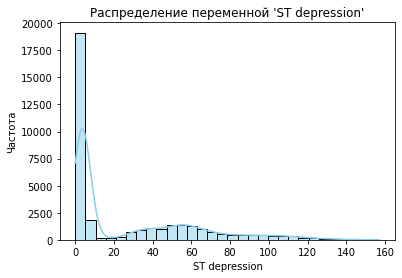

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(y, kde=True, color='skyblue', bins=30)
plt.title("Распределение переменной 'ST depression'")
plt.xlabel("ST depression")
plt.ylabel("Частота")


In [33]:
df['Usage_kWh'].value_counts().sort_index()

0.00        1
2.45        8
2.48       36
2.52      110
2.56      157
         ... 
149.65      1
151.31      1
151.67      1
153.14      1
157.18      1
Name: Usage_kWh, Length: 3343, dtype: int64

видим, что целевая переменная ограничена слева 0 и справа 157.18

Построим следующую модель, называемой моделью Тобина:

y = $\begin{cases}
y^*, y^* \in [0, 157.18] \\
0, y^* < 0 \\
157.18, y^* > 157.18
\end{cases}$,

где $y^* = \sum\beta_i x_i + \varepsilon$

In [34]:
y_hec = y.copy()
X_hec=X.copy()

In [35]:
limits = np.select([df['Usage_kWh'] == 157.18, df['Usage_kWh'] == 0], [1, -1], 0)

limits

array([0, 0, 0, ..., 0, 0, 0])

In [36]:
tobit_model = Tobit(y, sm.add_constant(X), limits, left=0, right=157.18).fit()

tobit_model.summary()

Optimization terminated successfully.
         Current function value: 2.961066
         Iterations: 905
         Function evaluations: 1295


<class 'statsmodels.iolib.summary.Summary'>
"""
                              Tobit Regression Results                             
===================================================================================
Dep. Variable:                   Usage_kWh   Pseudo R-squ:                    0.399
Method:                 Maximum Likelihood   Log-Likelihood:              -103755.7
No. Observations:                    35040   LL-Null:                     -172700.2
No. Uncensored Obs:                  35038   LL-Ratio:                     137888.8
No. Left-censored Obs:                   1   LLR p-value:                     0.000
No. Right-censored Obs:                  1   AIC:                          207533.5
Df Residuals:                        35029   BIC:                          207626.6
Df Model:                               10   Covariance Type:             nonrobust
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                  -11.2132      0.386    -29.040      0.000     -11.970     -10.456
date                                 -2.804e-05   2.47e-06    -11.333      0.000   -3.29e-05   -2.32e-05
Lagging_Current_Reactive.Power_kVarh     0.3106      0.004     79.196      0.000       0.303       0.318
Leading_Current_Reactive_Power_kVarh     0.0728      0.011      6.622      0.000       0.051       0.094
CO2(tCO2)                             1666.7392      4.926    338.348      0.000    1657.084    1676.394
Lagging_Current_Power_Factor             0.1206      0.003     46.620      0.000       0.115       0.126
Leading_Current_Power_Factor             0.0608      0.003     21.435      0.000       0.055       0.066
NSM                                  -1.424e-06   1.37e-06     -1.043      0.297    -4.1e-06    1.25e-06
WeekStatus                               0.0599      0.062      0.961      0.336      -0.062       0.182
Day_of_week                              0.0507      0.013      4.010      0.000       0.026       0.076
Load_Type                                0.7938      0.044     18.101      0.000       0.708       0.880
Log(Sigma)                               1.5423      0.004    408.261      0.000       1.535       1.550
========================================================================================================
"""

исключаем незначимые переменные NSM и WeekStatus	

In [37]:
df = df.drop(['NSM','WeekStatus'], axis=1)
X=df.drop("Usage_kWh",axis=1)
y=df["Usage_kWh"]
tobit_model = Tobit(y, sm.add_constant(X), limits, left=0, right=6).fit()

tobit_model.summary()

Optimization terminated successfully.
         Current function value: 2.960980
         Iterations: 602
         Function evaluations: 888


<class 'statsmodels.iolib.summary.Summary'>
"""
                              Tobit Regression Results                             
===================================================================================
Dep. Variable:                   Usage_kWh   Pseudo R-squ:                    0.399
Method:                 Maximum Likelihood   Log-Likelihood:              -103752.7
No. Observations:                    35040   LL-Null:                     -172690.6
No. Uncensored Obs:                  35038   LL-Ratio:                     137875.7
No. Left-censored Obs:                   1   LLR p-value:                     0.000
No. Right-censored Obs:                  1   AIC:                          207523.5
Df Residuals:                        35031   BIC:                          207599.7
Df Model:                                8   Covariance Type:             nonrobust
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                  -11.2199      0.375    -29.922      0.000     -11.955     -10.485
date                                 -2.806e-05   2.47e-06    -11.343      0.000   -3.29e-05   -2.32e-05
Lagging_Current_Reactive.Power_kVarh     0.3101      0.004     79.936      0.000       0.302       0.318
Leading_Current_Reactive_Power_kVarh     0.0730      0.011      6.685      0.000       0.052       0.094
CO2(tCO2)                             1666.7516      4.911    339.409      0.000    1657.127    1676.376
Lagging_Current_Power_Factor             0.1204      0.003     46.873      0.000       0.115       0.125
Leading_Current_Power_Factor             0.0609      0.003     22.024      0.000       0.055       0.066
Day_of_week                              0.0488      0.013      3.907      0.000       0.024       0.073
Load_Type                                0.7670      0.039     19.665      0.000       0.691       0.843
Log(Sigma)                               1.5422      0.004    408.253      0.000       1.535       1.550
========================================================================================================
"""

получаем следующую модель:
    
$y* = -11.2199 -0.00003x_{date}+0.3101x{LagCR.P}+0.07x_{LeadCR_P}+1666.75x_{CO2}+0.12x_{LagCPF}+0.061x_{LeadCPF}+0.049x_{dayweek}+0.767x_{loadtype}$

R = 0.4, что говорит об умеренной связи между переменными

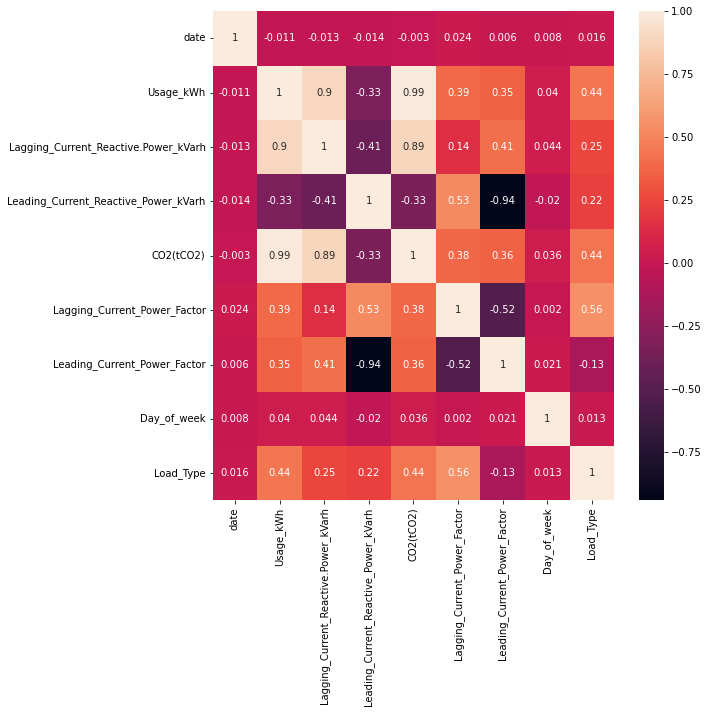

In [38]:
plt.figure(figsize=(9,9))
sns.heatmap(np.round(df.corr(),3),annot=True)
plt.show=()

мультиколлинеарность отсутствует